In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import sys
sys.prefix

'/usr/local/Cellar/jupyterlab/4.0.7_1/libexec'

In [17]:
sns.set_style(style = 'whitegrid')

# Read Data

Today, we will use CPS1985 data on the determinant of hourly wages

https://vincentarelbundock.github.io/Rdatasets/csv/AER/CPS1985.csv

The data description is available here:
https://rdrr.io/cran/AER/man/CPS1985.html

In [18]:
df_wage = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/AER/CPS1985.csv")

In [25]:
df_wage.head()

,rownames,wage,education,experience,age,ethnicity,region,gender,occupation,sector,union,married
0,1,5.10,8,21,35,hispanic,other,female,worker,manufacturing,no,yes
1,1100,4.95,9,42,57,cauc,other,female,worker,manufacturing,no,yes
2,2,6.67,12,1,19,cauc,other,male,worker,manufacturing,no,no
3,3,4.00,12,4,22,cauc,other,male,worker,other,no,no
4,4,7.50,12,17,35,cauc,other,male,worker,other,no,yes


In [ ]:
df_wage.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [26]:
df_wage.describe()

,rownames,wage,education,experience,age
count,534.000000,534.000000,534.000000,534.000000,534.000000
mean,268.559925,9.024064,13.018727,17.822097,36.833333
std,158.029800,5.139097,2.615373,12.379710,11.726573
min,1.000000,1.000000,2.000000,0.000000,18.000000
25%,134.250000,5.250000,12.000000,8.000000,28.000000
50%,267.500000,7.780000,12.000000,15.000000,35.000000
75%,400.750000,11.250000,15.000000,26.000000,44.000000
max,1100.000000,44.500000,18.000000,55.000000,64.000000


In [27]:
df_wage.corr()

ValueError: could not convert string to float: 'hispanic'

# Visualise one variable

## Distribution plot

<Axes: xlabel='wage', ylabel='Count'>

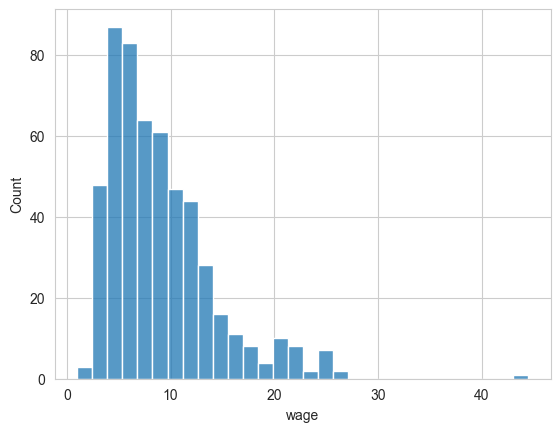

In [29]:
sns.histplot(x = 'wage', data = df_wage)

<Axes: xlabel='wage', ylabel='Count'>

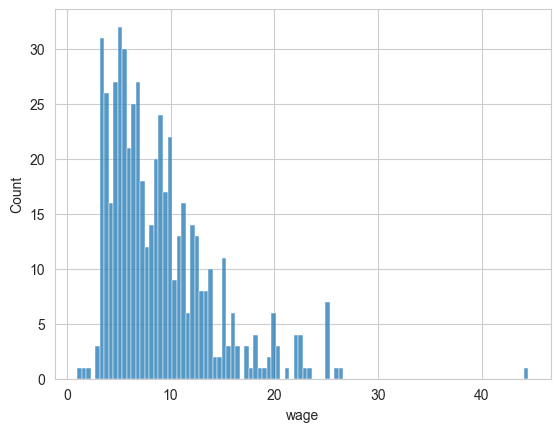

In [30]:
sns.histplot(x = 'wage', data = df_wage, bins = 100)

In [ ]:
sns.kdeplot(x = 'wage', data = df_wage)

In [ ]:
sns.kdeplot(x = 'wage', data = df_wage, bw_adjust=.1)

In [ ]:
sns.histplot(x = 'wage', data = df_wage, kde = True)

### Distribution plot, multiple

In [ ]:
vars = ['wage', 'age', 'education', 'experience']

fig, axes = plt.subplots(2, 2, figsize = (8, 4))
axes = axes.flatten()

for i in range(len(vars)):
  sns.histplot(x = vars[i], data = df_wage, ax = axes[i], kde = True)#i // 2, i % 2], kde = True)

plt.tight_layout()

## Count plot

In [ ]:
sns.countplot(x = 'sector', data = df_wage)

In [ ]:
sns.countplot(y = 'sector', data = df_wage)

In [ ]:
vars = ['gender', 'region', 'ethnicity']

fig, axes = plt.subplots(1, 3, figsize = (8, 4))

for i in range(3):
  sns.countplot(x = vars[i], data =df_wage, ax = axes[i])

plt.tight_layout()


# Visualise two variables

## Scatter plot

In [ ]:
sns.scatterplot(x = 'education', y = 'wage', data = df_wage)

In [ ]:
sns.scatterplot(x = 'education', y = 'wage', data = df_wage, alpha = .5)

## 2d-density Plot

In [ ]:
sns.kdeplot(x = "education", y = "wage", 
                data = df_wage, fill = True)

## Boxplot, violinplot

In [ ]:
sns.boxplot(x = 'ethnicity', y = 'wage', data = df_wage)

In [ ]:
sns.violinplot(x = 'ethnicity', y = 'wage', data = df_wage)

## Barplot

In [ ]:
sns.barplot(x = 'ethnicity', y = 'wage', data = df_wage, estimator = np.mean)

In [ ]:
sns.barplot(x = 'ethnicity', y = 'wage', data = df_wage, estimator = np.std)

# Adding more layers

## Add a variable to scatter plots

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = "education", y = "wage", hue = 'gender',
                data = df_wage, alpha=.4)

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = "education", y = "age", hue = 'wage',
                data = df_wage, palette = "Greens")

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = "education", y = "age", size = 'wage', 
                sizes = (40, 400),
                data = df_wage, alpha = .3)

## Colours in categorical plots

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(x = "wage", hue = 'gender',  multiple="stack",
                data = df_wage)

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = "ethnicity", y = "wage", hue = 'gender',
                data = df_wage)

# Misc

## Joint plot

In [ ]:
plt.figure(figsize = (5, 5))
sns.jointplot(x ='education', y = "wage",
                data = df_wage)

In [ ]:
plt.figure(figsize = (5, 5))
sns.jointplot(x ='education', y = "wage", hue = 'gender', alpha = .5,
                data = df_wage)

In [ ]:
plt.figure(figsize = (5, 5))
sns.jointplot(x ='education', y = "wage",
                data = df_wage, kind = 'reg')

In [ ]:
plt.figure(figsize = (5, 5))
sns.jointplot(x ='education', y = "wage", 
                data = df_wage, kind = 'hex')

In [ ]:
sns.pairplot(df_wage).savefig("pair.png")

In [ ]:
sns.pairplot(df_wage, hue = 'gender', palette="Set1")

In [28]:
sns.load_dataset("iris")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
